<a href="https://colab.research.google.com/github/ploydang/emag_acy67/blob/main/66050225_lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/nayot/emag-jupyter/refs/heads/main/pics/lecture_banner.webp)
# LECTURE 06 Sheet Charges and Introduction to Gauss' Law

# 514336 Engineering Electromagnetic Field

## สนามไฟฟ้าเนื่องจากประจุแบบแผ่น

**ตัวอย่าง** ประจุแบบแผ่นจานวางอยู่บนระนาบ x-y ($z=0)$ มีความหนาแน่นประจุ $\rho_s=1~\mu\mathrm{C/m^2}$ และมีรัศมี $1~\mathrm{m}$ จงหาสนามไฟฟ้าเนื่องจากประจุตัวนี้
  
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Sheet Charge Definition
$$dq=\rho_s(r')ds$$



ในข้อนี้ เราสามารถใช้ Cylindrical Coordinate System เป็นตัวแปรเสริมสำหรับประจุรูปจานกล่าวคือ

$$\mathbf{r'}=\rho\cos(\phi)\mathbf{a}_x+\rho\sin(\phi)\mathbf{a}_y=\begin{bmatrix}\rho\cos{\phi}\\ \rho\sin\phi\\0\end{bmatrix}$$

และ

$$ds=\rho d\rho d\phi$$

ดังนั้น

$$dq=\rho_s(\mathbf{r'})\,\rho d\rho d\phi$$

In [ ]:
# reset (clear) ตัวแปรใน cells ก่อนหน้านี้ -- แนะนำให้ทำทุกครั้งที่เริ่มทำข้อใหม่ เพื่อป้องกันการสับสน
%reset -f

In [ ]:
import sympy as smp
import numpy as np
from scipy.constants import pi, epsilon_0
from scipy.integrate import dblquad

# YOUR CODE HERE
x, y, z = smp.symbols("x, y, z", real=True)
rho = smp.symbols("rho", real=True, positive=True)
phi = smp.symbols("phi", real=True)
rho_s = 1e-6 # Surface charge density
radius = 1.0 # radius = 1 m

# Position and displacement vectors
r = smp.Matrix([x, y, z])
rp = smp.Matrix([
    rho * smp.cos(phi),
    rho * smp.sin(phi),
    0
])
R = r - rp

# กฏของคูลลอมป์
dqds = rho_s * rho # dqds -> dq/(drho dqhi)
dEds = dqds / (4 * pi * epsilon_0) * R / R.norm()**3

# Lambdify
dExds = smp.lambdify([rho, phi, x, y, z], dEds[0])
dEyds = smp.lambdify([rho, phi, x, y, z], dEds[1])
dEzds = smp.lambdify([rho, phi, x, y, z], dEds[2])

# Integrate
def E(x, y, z):
    Ex = dblquad(dExds, 0, 2 * pi, 0, radius, args=(x, y, z))[0]
    Ey = dblquad(dEyds, 0, 2 * pi, 0, radius, args=(x, y, z))[0]
    Ez = dblquad(dEzds, 0, 2 * pi, 0, radius, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])

In [ ]:
E(20, 20, 5)

array([23.84009078, 23.84009078,  5.96544644])

field_plot สนามไฟฟ้าจากมุมมอง side view ($x=0$)

In [ ]:
def E_side(y, z):
    _, Ey, Ez = E(0, y, z)
    return np.array([Ey, Ez])

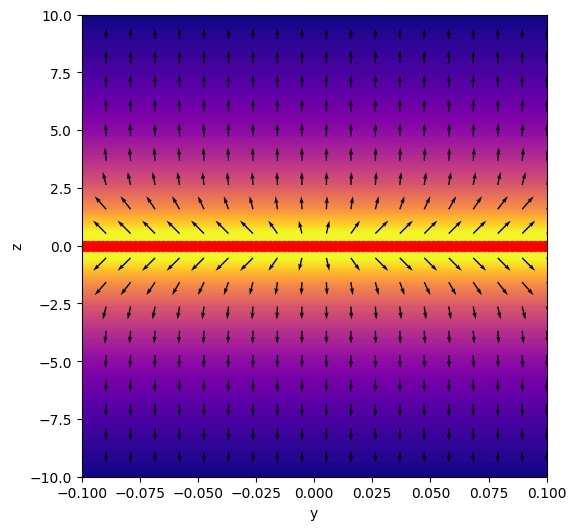

In [ ]:
import matplotlib.pyplot as plt
from libemag.plots import field_plot

plt.figure(figsize=(6, 6))
field_plot(E_side, x_min=-0.1, x_max=0.1, contour=True)
plt.xlabel("y")
plt.ylabel("z")
yv = np.linspace(-1, 1, 1000)
zv = np.zeros(len(yv))
plt.scatter(yv, zv, color='r', s=50)


In [ ]:
import sympy as smp
import scipy.constants as sp
from scipy.integrate import dblquad



# กฎของเกาส์ (Gauss' Law)

## Activity 1

ประจุรูปทรงกลมกลวงบางตัวหนึ่ง มีความหนาแน่นประจุเชิงพื้นผิว $\rho_s=1~\mu\mathrm{C/m^2}$ หากประจุตัวนี้มีรัศมี $25~\mathrm{cm}$ จงหาประจุรวม $Q$ ของประจุตัวนี้ (2 คะแนน)

In [ ]:
!pip install SciencePlots

In [ ]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [61.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,663 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2

In [ ]:
import numpy as np
from scipy.constants import pi

def Q():
    rho_s = 1e-6  # ความหนาแน่นประจุพื้นผิว (C/m^2)
    r = 0.25  # รัศมี (m)
    A = 4 * pi * r**2  # พื้นที่ผิวทรงกลม (m^2)
    total_charge = rho_s * A  # ประจุรวม (C)
    return total_charge

In [ ]:
# Checking -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
print(f"Your answer: {Q()}")


Your answer: 7.853981633974482e-07


## Activity 2
จากประจุใน Activity 1 จงพล็อตขนาดของความหนาแน่นฟลักซ์ไฟฟ้า (Electric Flux Desnsity) ที่ระยะห่างต่าง ๆ จากจุดศูนย์กลางของประจุ ระหว่าง $-1\leq r\leq 1~\mathrm{m}$เมื่อจุดศูนย์กลางของประจุตัวนี้อยู่ที่จุดกำเนิด (Origin) (3 คะแนน)

**ระวัง!** อย่าลืม return True เพื่อให้ระบบตรวจสามารถให้คะแนนได้

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["grid", "notebook", "science"])

def plot_activity2():
    # YOUR CODE HERE
     # ค่าประจุรวมจาก Activity 1
    Q = 1e-6 * 4 * np.pi * (0.25 ** 2)  # คำนวณ Q ใหม่จากข้อมูล Activity 1
    r = np.linspace(-1, 1, 500)  # ระยะจาก -1 ถึง 1 m
    # หลีกเลี่ยงการหารด้วย 0
    r[r == 0] = np.nan  # ทำให้ตำแหน่ง r=0 เป็น NaN
    D = Q / (4 * np.pi * r**2)  # คำนวณ D

    plt.figure(figsize=(8, 6))
    plt.plot(r, D, label="Electric Flux Density (D)")
    plt.axvline(0, color='red', linestyle='--', label="Origin")
    plt.xlabel("r (m)")
    # Enclose the unit in dollar signs for LaTeX rendering
    plt.ylabel(r"D (C/m$^2$)")
    plt.title("Electric Flux Density (D) vs Distance (r)")
    plt.legend()
    plt.grid()
    plt.show()
    return True


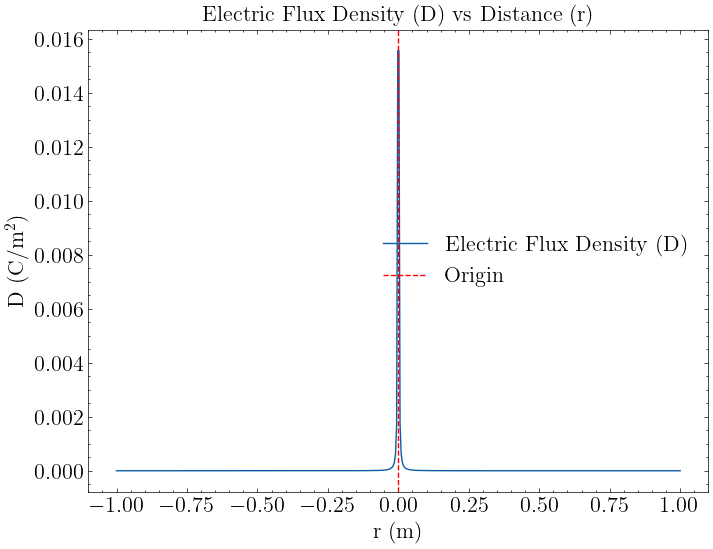

In [ ]:
assert plot_activity2()

## Activity 3
จงใช้กฎของคูลอมป์ในการหาความหนาแน่นฟลักซ์ไฟฟ้า $\mathbf{D(r)}$ ณ ตำแหน่ง ($x, y, z$) ใด ๆ เนื่องจากประจุรูปทรงกลมกลวงใน Activity 1 (5 คะแนน)

**Hint** จาก $\mathbf{D}=\epsilon_0\mathbf{E}$ ดังนั้นเราสามารถหา $\mathbf{D}$ ได้จากสูตรการหาสนามไฟฟ้าเดิมได้ เช่น

$$\mathbf{D}=\frac{Q}{4\pi}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$

In [ ]:
# Reset
%reset -f

In [ ]:
import sympy as smp
import numpy as np
from scipy.constants import pi, epsilon_0
from scipy.integrate import dblquad

def E(xv, yv, zv):
    # ค่ารัศมีของทรงกลม
    R = 0.25  # m
    rho_s = 1e-6  # C/m^2

    # ฟังก์ชันระยะห่าง |r - r'| และส่วนประกอบของเวกเตอร์
    def integrand(theta, phi):
        # ตำแหน่ง r'
        x_prime = R * np.sin(theta) * np.cos(phi)
        y_prime = R * np.sin(theta) * np.sin(phi)
        z_prime = R * np.cos(theta)

        # เวกเตอร์ r - r'
        dx = xv - x_prime
        dy = yv - y_prime
        dz = zv - z_prime
        distance = np.sqrt(dx**2 + dy**2 + dz**2)

        # คำนวณ D เวกเตอร์
        return (rho_s * R**2 * np.sin(theta) * np.array([dx, dy, dz]) / (distance**3))

    # อินทิเกรตในพิกัดเชิงมุม
    result_x = dblquad(lambda theta, phi: integrand(theta, phi)[0], 0, 2*pi, lambda x: 0, lambda x: pi)[0]
    result_y = dblquad(lambda theta, phi: integrand(theta, phi)[1], 0, 2*pi, lambda x: 0, lambda x: pi)[0]
    result_z = dblquad(lambda theta, phi: integrand(theta, phi)[2], 0, 2*pi, lambda x: 0, lambda x: pi)[0]

    return np.array([result_x, result_y, result_z])

In [ ]:
# Testing -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
def E_ans(xv, yv, zv):
    # Problem Parameters
    radius = 0.25
    rho_s = 1e-6

    # Sympy variables
    x, y, z, theta, phi = smp.symbols("x, y, z, theta, phi", real=True)

    # position and displacement vectors
    r = smp.Matrix([x, y, z])
    rp = smp.Matrix([
        radius * smp.sin(theta) * smp.cos(phi),
        radius * smp.sin(theta) * smp.sin(phi),
        radius * smp.cos(theta)
    ])
    R = r - rp

    # Find dq
    dqds = rho_s * radius**2 * smp.sin(theta)  # ds -> dtheta * dphi

    # Coulombs
    dDds = dqds / (4 * pi) * R / R.norm()**3

    # Lambdify
    dDxds = smp.lambdify([theta, phi, x, y, z], dDds[0])
    dDyds = smp.lambdify([theta, phi, x, y, z], dDds[1])
    dDzds = smp.lambdify([theta, phi, x, y, z], dDds[2])

    # Integrate
    Dx = dblquad(dDxds, 0, 2 * pi, 0, pi, args=(xv, yv, zv))[0]
    Dy = dblquad(dDyds, 0, 2 * pi, 0, pi, args=(xv, yv, zv))[0]
    Dz = dblquad(dDzds, 0, 2 * pi, 0, pi, args=(xv, yv, zv))[0]

    return np.array([Dx, Dy, Dz])

assert (E(0, 0, 0) - E_ans(0, 0, 0))[0] <= 1e-6
assert (E(0.1, -0.1, 0.1) - E_ans(0.1, -0.1, 0.1))[1] <= 1e-6
assert (E(1, 2, 3) - E_ans(1, 2, 3))[2] <= 1e-6

## Activity 4
จงพล็อตสนามไฟฟ้าเนื่องจากประจุรูปทรงกลมกลวงดังกล่าวใน 2 มิติ บนระนาบ $(x, y)$ (3 คะแนน)

In [ ]:
from libemag.plots import field_plot
import matplotlib.pyplot as plt
import numpy as np

def E2Dplot():
    # กำหนดค่ารัศมีของทรงกลมและความหนาแน่นประจุ
    R = 0.25  # รัศมีของทรงกลม (m)
    rho_s = 1e-6  # ความหนาแน่นประจุพื้นผิว (C/m^2)

    # กำหนดฟังก์ชันสนามไฟฟ้า E
    def electric_field(x, y):
        # ระยะทางจากจุดศูนย์กลาง
        r = np.sqrt(x**2 + y**2)
        # หลีกเลี่ยงการหารด้วยศูนย์
        r[r < R] = R
        # คำนวณสนามไฟฟ้า
        E_magnitude = rho_s * R**2 / (4 * np.pi * epsilon_0 * r**2)
        Ex = E_magnitude * x / r
        Ey = E_magnitude * y / r
        return Ex, Ey

    # สร้างตารางพิกัดในระนาบ x-y
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, y)

    # คำนวณสนามไฟฟ้าบนแต่ละจุด
    Ex, Ey = electric_field(X, Y)

    # ใช้ field_plot เพื่อแสดงผล
    plt.figure(figsize=(8, 8))
    plt.quiver(X, Y, Ex, Ey, color="blue")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.title("Electric Field due to Spherical Charge")
    plt.grid()
    plt.axis("equal")
    plt.show()

    return True

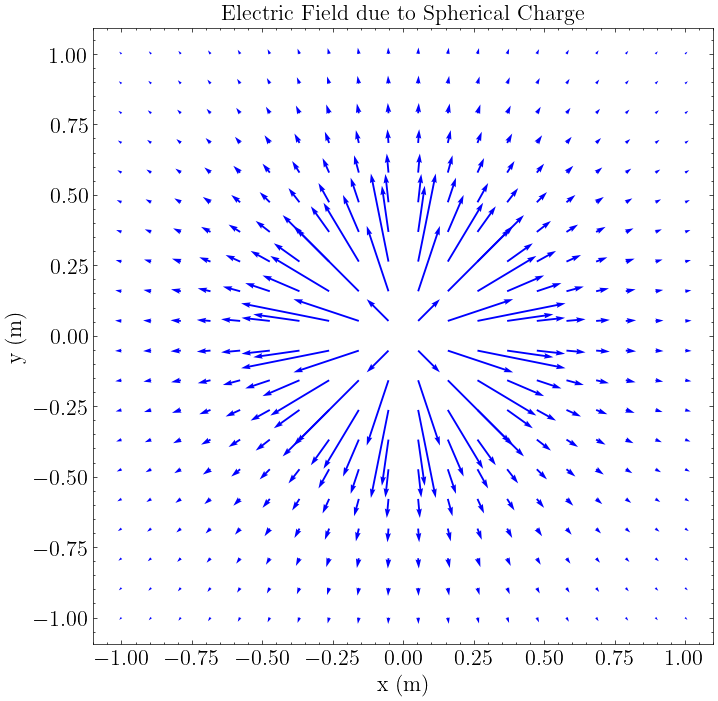

In [ ]:
# Testing -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert E2Dplot()